In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
data = pd.read_excel("KPIs_Data.xlsx")

data.head()


,Subscription_Id,og_usage_m3,og_usage_m2,og_usage_m1,data_usage_m3,data_usage_m2,data_usage_m1,rev_m3,rev_m2,rev_m1,Rate_Plan_Desc,Most_Used_Region,aon,post_migration_plan
0,127122557,3422,3862,3679,4578,8225,6200,61.31,318.42,547.56,BundleChild Voice,G.Cairo,2942,Bundle 2000
1,157038198,1257,755,953,33,14,10,9.61,10.44,11.27,BundleChild Voice,?,112,Bundle 2000
2,192116383,612,1153,617,4514,1081,5468,739.55,863.5,2280.21,Bundle1150,G.Cairo,?,Bundle 2000
3,116872408,3882,1796,2270,42645,20197,23004,378.83,1010.38,1552.94,Bundle230,G.Cairo,3225,Bundle 2000
4,86447560,347,380,317,1434,1841,960,26.95,238.17,634.22,Bundle230,G.Cairo,3592,Bundle 2000


In [3]:
print("Shape:", data.shape)

print("\nData types:\n", data.dtypes)

print("\nMissing values per column:\n", data.isnull().sum())


Shape: (70000, 14)

Data types:
 Subscription_Id         int64
og_usage_m3            object
og_usage_m2            object
og_usage_m1            object
data_usage_m3          object
data_usage_m2          object
data_usage_m1          object
rev_m3                 object
rev_m2                 object
rev_m1                 object
Rate_Plan_Desc         object
Most_Used_Region       object
aon                    object
post_migration_plan    object
dtype: object

Missing values per column:
 Subscription_Id        0
og_usage_m3            0
og_usage_m2            0
og_usage_m1            0
data_usage_m3          0
data_usage_m2          0
data_usage_m1          0
rev_m3                 0
rev_m2                 0
rev_m1                 0
Rate_Plan_Desc         0
Most_Used_Region       0
aon                    0
post_migration_plan    0
dtype: int64


### Replace and (Data Cleaning)

In [4]:

data.replace("?", np.nan, inplace=True)

numeric_cols = [
    'og_usage_m3','og_usage_m2','og_usage_m1',
    'data_usage_m3','data_usage_m2','data_usage_m1',
    'rev_m3','rev_m2','rev_m1','aon'
]

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

print(data.dtypes)

Subscription_Id          int64
og_usage_m3            float64
og_usage_m2            float64
og_usage_m1            float64
data_usage_m3          float64
data_usage_m2          float64
data_usage_m1          float64
rev_m3                 float64
rev_m2                 float64
rev_m1                 float64
Rate_Plan_Desc          object
Most_Used_Region        object
aon                    float64
post_migration_plan     object
dtype: object


In [5]:
print("\nMissing values per column:\n", data.isnull().sum())


Missing values per column:
 Subscription_Id            0
og_usage_m3             3710
og_usage_m2             3710
og_usage_m1             3710
data_usage_m3           3710
data_usage_m2           3710
data_usage_m1           3710
rev_m3                  1296
rev_m2                   483
rev_m1                   443
Rate_Plan_Desc             0
Most_Used_Region        9058
aon                      479
post_migration_plan    69296
dtype: int64


### (Descriptive Statistics)

In [6]:
data[numeric_cols].describe()


,og_usage_m3,og_usage_m2,og_usage_m1,data_usage_m3,data_usage_m2,data_usage_m1,rev_m3,rev_m2,rev_m1,aon
count,66290.000000,66290.000000,66290.000000,66290.000000,66290.00000,66290.000000,68704.000000,69517.000000,69557.000000,69521.000000
mean,910.891175,933.928541,877.065032,12128.626459,12027.63717,11258.994449,295.261881,604.290667,939.871669,2158.350901
std,942.605711,963.610791,912.963543,15074.356915,14878.45741,14138.312386,444.669094,880.042702,1336.551749,1766.853047
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-5320.020000,-3948.990000,-3955.680000,88.000000
25%,163.000000,167.000000,140.000000,1689.250000,1668.00000,1296.000000,0.830000,1.660000,2.490000,587.000000
50%,669.000000,693.000000,649.000000,8081.000000,8082.50000,7463.500000,151.955000,335.400000,547.360000,1680.000000
75%,1354.000000,1386.000000,1316.000000,16501.000000,16279.00000,15355.750000,394.185000,813.600000,1271.700000,3619.000000
max,24184.000000,23039.000000,15813.000000,420677.000000,347262.00000,325738.000000,15523.180000,33285.910000,45807.430000,6192.000000


### Usage Distribution (Histograms)

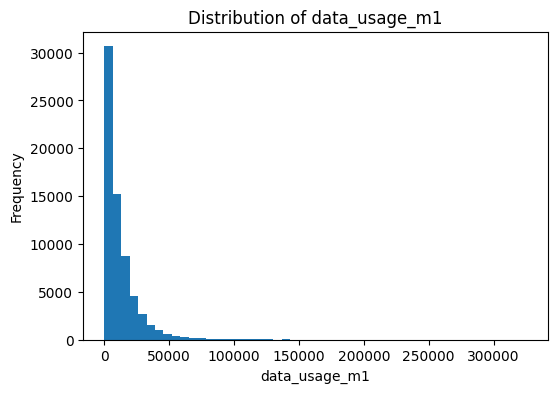

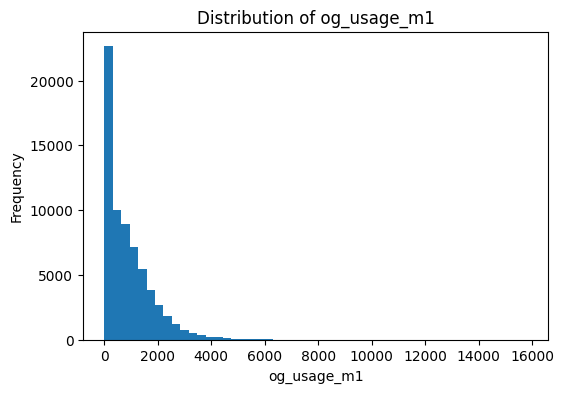

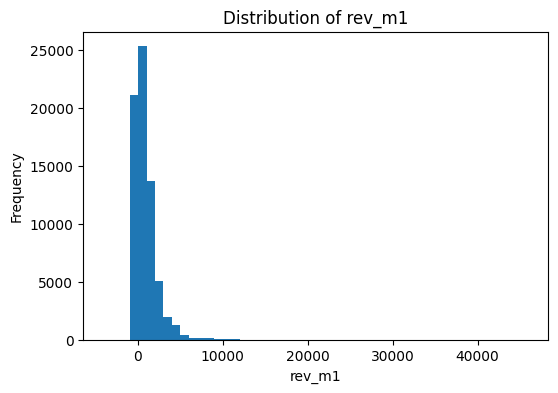

In [7]:
import matplotlib.pyplot as plt

cols_to_plot = ['data_usage_m1', 'og_usage_m1', 'rev_m1']

for col in cols_to_plot:
    plt.figure(figsize=(6,4))
    plt.hist(data[col].dropna(), bins=50)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


### Outlier Detection (Boxplots)

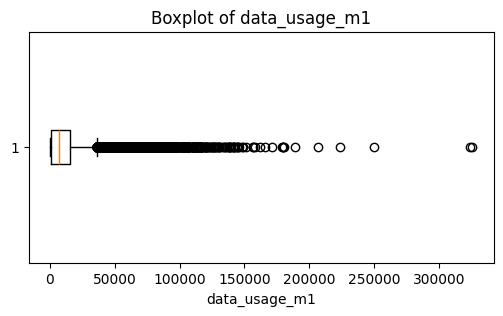

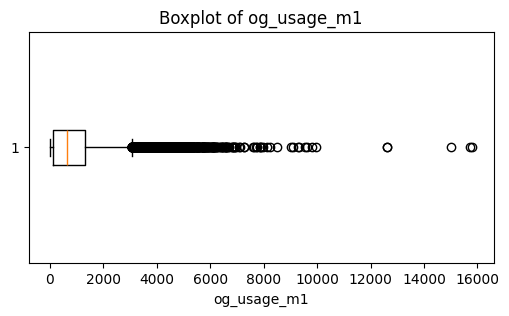

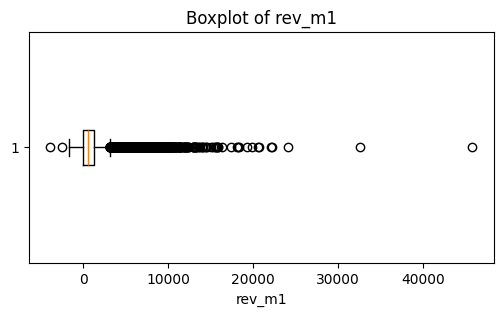

In [8]:
for col in cols_to_plot:
    plt.figure(figsize=(6,3))
    plt.boxplot(data[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


### Internet usage

In [9]:
col = 'data_usage_m1'
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(f"Lower limit: {lower_limit:.2f}")
print(f"Upper limit: {upper_limit:.2f}")

outlier_rows_count = (data[col] > upper_limit).sum()
print(f"num of row: {outlier_rows_count}")

outliers = data[data[col] > upper_limit]
outliers[['Subscription_Id', 'data_usage_m1']].head(10)






Lower limit: -19793.62
Upper limit: 36445.38
num of row: 3458


,Subscription_Id,data_usage_m1
18,8691177,54756.0
31,26761245,39699.0
60,82663327,42676.0
63,103596280,36982.0
88,80138641,36650.0
93,192443448,69042.0
107,119989968,47569.0
108,4309561,43215.0
133,140788148,53619.0
135,176827447,42553.0


In [10]:
col = 'data_usage_m1'

Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

above_upper = (data[col] > upper_limit).sum()

missing = data[col].isna().sum()

filtered_data = data[data[col] <= upper_limit]
used_rows = len(filtered_data)

print(f"Rows above upper limit: {above_upper}")
print(f"Rows with NaN: {missing}")
print(f"Rows used after filtering: {used_rows}")
print(f"Total rows: {len(data)}")
print(f"Rows excluded in total: {len(data) - used_rows}")

Rows above upper limit: 3458
Rows with NaN: 3710
Rows used after filtering: 62832
Total rows: 70000
Rows excluded in total: 7168


In [11]:
col = 'data_usage_m2'
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(f"Lower limit: {lower_limit:.2f}")
print(f"Upper limit: {upper_limit:.2f}")

outlier_rows_count = (data[col] > upper_limit).sum()
print(f"num of row: {outlier_rows_count}")

outliers = data[data[col] > upper_limit]
outliers[['Subscription_Id', 'data_usage_m2']].head(10)

Lower limit: -20248.50
Upper limit: 38195.50
num of row: 3510


,Subscription_Id,data_usage_m2
17,174402460,43311.0
18,8691177,51292.0
93,192443448,68797.0
107,119989968,42950.0
135,176827447,41409.0
151,155968333,56639.0
250,193765578,54653.0
256,78454408,38807.0
267,186094805,92295.0
298,166753156,47843.0


In [12]:
col = 'data_usage_m2'

Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

above_upper = (data[col] > upper_limit).sum()

missing = data[col].isna().sum()

filtered_data = data[data[col] <= upper_limit]
used_rows = len(filtered_data)

print(f"Rows above upper limit: {above_upper}")
print(f"Rows with NaN: {missing}")
print(f"Rows used after filtering: {used_rows}")
print(f"Total rows: {len(data)}")
print(f"Rows excluded in total: {len(data) - used_rows}")

Rows above upper limit: 3510
Rows with NaN: 3710
Rows used after filtering: 62780
Total rows: 70000
Rows excluded in total: 7220


In [13]:
col = 'data_usage_m3'
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(f"Lower limit: {lower_limit:.2f}")
print(f"Upper limit: {upper_limit:.2f}")

outlier_rows_count = (data[col] > upper_limit).sum()
print(f"num of row: {outlier_rows_count}")

outliers = data[data[col] > upper_limit]
outliers[['Subscription_Id', 'data_usage_m3']].head(10)

Lower limit: -20528.38
Upper limit: 38718.62
num of row: 3470


,Subscription_Id,data_usage_m3
3,116872408,42645.0
18,8691177,49857.0
107,119989968,47398.0
108,4309561,40103.0
133,140788148,43045.0
151,155968333,51964.0
246,185778384,44370.0
250,193765578,54228.0
267,186094805,54869.0
302,136427597,42259.0


In [14]:
col = 'data_usage_m3'

Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

above_upper = (data[col] > upper_limit).sum()

missing = data[col].isna().sum()

filtered_data = data[data[col] <= upper_limit]
used_rows = len(filtered_data)

print(f"Rows above upper limit: {above_upper}")
print(f"Rows with NaN: {missing}")
print(f"Rows used after filtering: {used_rows}")
print(f"Total rows: {len(data)}")
print(f"Rows excluded in total: {len(data) - used_rows}")

Rows above upper limit: 3470
Rows with NaN: 3710
Rows used after filtering: 62820
Total rows: 70000
Rows excluded in total: 7180


Mean (without outliers): 8873.51
Median (without outliers): 6792.00
Number of rows used: 62832


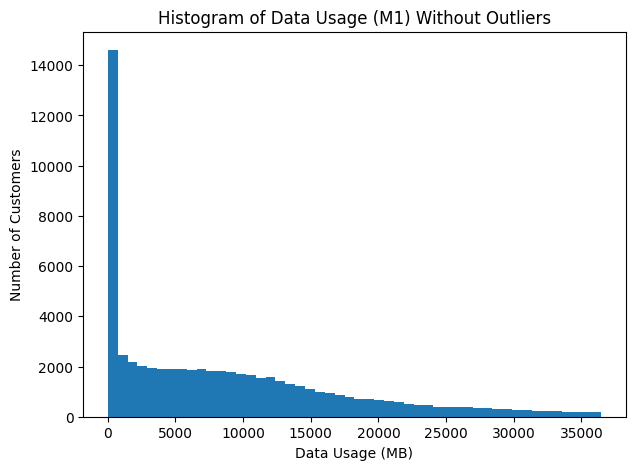

In [15]:
col = 'data_usage_m1'

Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

filtered_data = data[data[col] <= upper_limit]

mean_value = filtered_data[col].mean()
median_value = filtered_data[col].median()

print(f"Mean (without outliers): {mean_value:.2f}")
print(f"Median (without outliers): {median_value:.2f}")
print(f"Number of rows used: {len(filtered_data)}")

plt.figure(figsize=(7,5))
plt.hist(filtered_data[col].dropna(), bins=50)
plt.title("Histogram of Data Usage (M1) Without Outliers")
plt.xlabel("Data Usage (MB)")
plt.ylabel("Number of Customers")
plt.show()



Mean (without outliers): 9488.94
Median (without outliers): 7353.00
Number of rows used: 62780


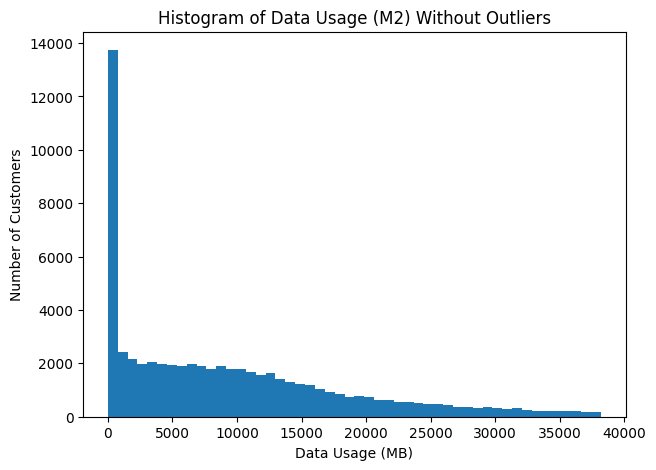

In [16]:
col = 'data_usage_m2'

Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

filtered_data = data[data[col] <= upper_limit]

mean_value = filtered_data[col].mean()
median_value = filtered_data[col].median()

print(f"Mean (without outliers): {mean_value:.2f}")
print(f"Median (without outliers): {median_value:.2f}")
print(f"Number of rows used: {len(filtered_data)}")

plt.figure(figsize=(7,5))
plt.hist(filtered_data[col].dropna(), bins=50)
plt.title("Histogram of Data Usage (M2) Without Outliers")
plt.xlabel("Data Usage (MB)")
plt.ylabel("Number of Customers")
plt.show()

Mean (without outliers): 9591.04
Median (without outliers): 7385.00
Number of rows used: 62820


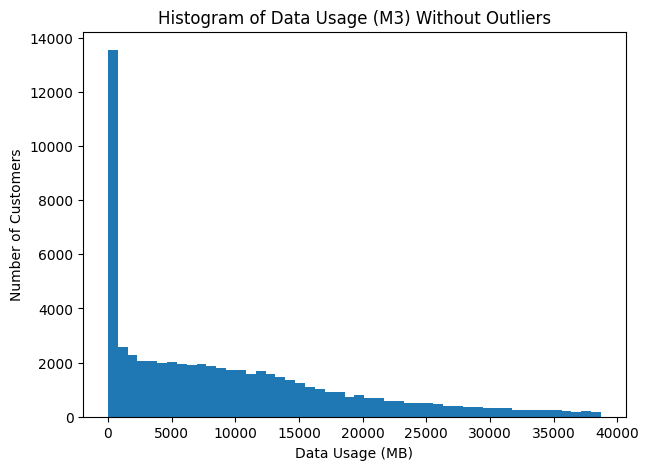

In [17]:
col = 'data_usage_m3'

Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

filtered_data = data[data[col] <= upper_limit]

mean_value = filtered_data[col].mean()
median_value = filtered_data[col].median()

print(f"Mean (without outliers): {mean_value:.2f}")
print(f"Median (without outliers): {median_value:.2f}")
print(f"Number of rows used: {len(filtered_data)}")

plt.figure(figsize=(7,5))
plt.hist(filtered_data[col].dropna(), bins=50)
plt.title("Histogram of Data Usage (M3) Without Outliers")
plt.xlabel("Data Usage (MB)")
plt.ylabel("Number of Customers")
plt.show()

In [53]:
for col in ['data_usage_m1', 'data_usage_m2', 'data_usage_m3']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data['total_data_usage'] = data['data_usage_m1'] + data['data_usage_m2'] + data['data_usage_m3']

data[['Subscription_Id', 'data_usage_m1', 'data_usage_m2', 'data_usage_m3', 'total_data_usage']].head()


,Subscription_Id,data_usage_m1,data_usage_m2,data_usage_m3,total_data_usage
0,127122557,6200.0,8225.0,4578.0,19003.0
1,157038198,10.0,14.0,33.0,57.0
2,192116383,5468.0,1081.0,4514.0,11063.0
3,116872408,23004.0,20197.0,42645.0,85846.0
4,86447560,960.0,1841.0,1434.0,4235.0


In [56]:
data['total_data_usage'].mean()


np.float64(35415.2580781415)

### og_usage

In [18]:
col = 'og_usage_m1'

Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Lower limit: {lower_limit:.2f}")
print(f"Upper limit: {upper_limit:.2f}")

outlier_rows_count = (data[col] > upper_limit).sum()
print(f"Num of rows : {outlier_rows_count}")

outliers = data[data[col] > upper_limit]
outliers[['Subscription_Id', 'og_usage_m1']].head(10)


Lower limit: -1624.00
Upper limit: 3080.00
Num of rows : 1833


,Subscription_Id,og_usage_m1
0,127122557,3679.0
64,154052675,3176.0
120,127459328,4838.0
150,170173029,3084.0
185,151673526,3479.0
187,107688776,3395.0
194,193231371,3158.0
222,193662171,3131.0
286,100905621,3090.0
304,182932282,3986.0


In [19]:
col = 'og_usage_m1'

Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

above_upper = (data[col] > upper_limit).sum()

missing = data[col].isna().sum()

filtered_data = data[data[col] <= upper_limit]
used_rows = len(filtered_data)

print(f"Rows above upper limit: {above_upper}")
print(f"Rows with NaN: {missing}")
print(f"Rows used after filtering: {used_rows}")
print(f"Total rows: {len(data)}")
print(f"Rows excluded in total: {len(data) - used_rows}")


Rows above upper limit: 1833
Rows with NaN: 3710
Rows used after filtering: 64457
Total rows: 70000
Rows excluded in total: 5543


In [20]:
col = 'og_usage_m2'

Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Lower limit: {lower_limit:.2f}")
print(f"Upper limit: {upper_limit:.2f}")

outlier_rows_count = (data[col] > upper_limit).sum()
print(f"Num of rows : {outlier_rows_count}")

outliers = data[data[col] > upper_limit]
outliers[['Subscription_Id', 'og_usage_m2']].head(10)

Lower limit: -1661.50
Upper limit: 3214.50
Num of rows : 1948


,Subscription_Id,og_usage_m2
0,127122557,3862.0
64,154052675,4720.0
165,19755328,3259.0
185,151673526,3292.0
187,107688776,4725.0
222,193662171,4411.0
304,182932282,3555.0
324,138442973,3412.0
325,19428301,3505.0
357,133640692,3618.0


In [21]:
col = 'og_usage_m2'

Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

above_upper = (data[col] > upper_limit).sum()

missing = data[col].isna().sum()

filtered_data = data[data[col] <= upper_limit]
used_rows = len(filtered_data)

print(f"Rows above upper limit: {above_upper}")
print(f"Rows with NaN: {missing}")
print(f"Rows used after filtering: {used_rows}")
print(f"Total rows: {len(data)}")
print(f"Rows excluded in total: {len(data) - used_rows}")

Rows above upper limit: 1948
Rows with NaN: 3710
Rows used after filtering: 64342
Total rows: 70000
Rows excluded in total: 5658


In [22]:
col = 'og_usage_m3'

Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Lower limit: {lower_limit:.2f}")
print(f"Upper limit: {upper_limit:.2f}")

outlier_rows_count = (data[col] > upper_limit).sum()
print(f"Num of rows : {outlier_rows_count}")

outliers = data[data[col] > upper_limit]
outliers[['Subscription_Id', 'og_usage_m3']].head(10)

Lower limit: -1623.50
Upper limit: 3140.50
Num of rows : 2012


,Subscription_Id,og_usage_m3
0,127122557,3422.0
3,116872408,3882.0
64,154052675,4410.0
120,127459328,3869.0
165,19755328,3537.0
187,107688776,4106.0
222,193662171,5808.0
308,194138994,3193.0
340,20571820,3337.0
372,193466916,7312.0


In [23]:
col = 'og_usage_m3'

Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

above_upper = (data[col] > upper_limit).sum()

missing = data[col].isna().sum()

filtered_data = data[data[col] <= upper_limit]
used_rows = len(filtered_data)

print(f"Rows above upper limit: {above_upper}")
print(f"Rows with NaN: {missing}")
print(f"Rows used after filtering: {used_rows}")
print(f"Total rows: {len(data)}")
print(f"Rows excluded in total: {len(data) - used_rows}")

Rows above upper limit: 2012
Rows with NaN: 3710
Rows used after filtering: 64278
Total rows: 70000
Rows excluded in total: 5722


Mean (without outliers): 789.33
Median (without outliers): 618.00
Number of rows used: 64457


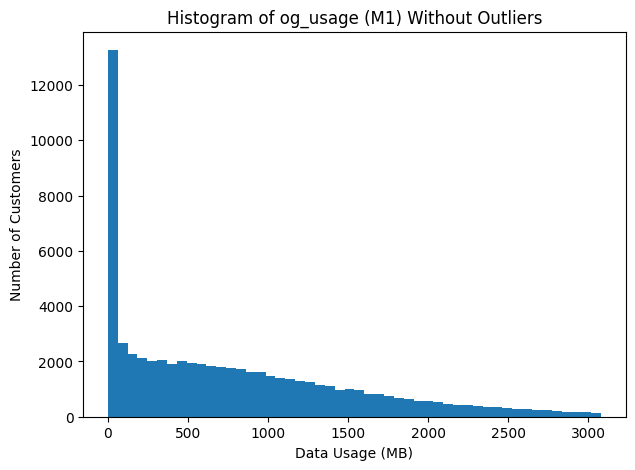

In [24]:
col = 'og_usage_m1'

Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

filtered_data = data[data[col] <= upper_limit]

mean_value = filtered_data[col].mean()
median_value = filtered_data[col].median()

print(f"Mean (without outliers): {mean_value:.2f}")
print(f"Median (without outliers): {median_value:.2f}")
print(f"Number of rows used: {len(filtered_data)}")

plt.figure(figsize=(7,5))
plt.hist(filtered_data[col].dropna(), bins=50)
plt.title("Histogram of og_usage (M1) Without Outliers")
plt.xlabel("Data Usage (MB)")
plt.ylabel("Number of Customers")
plt.show()

Mean (without outliers): 836.72
Median (without outliers): 658.00
Number of rows used: 64342


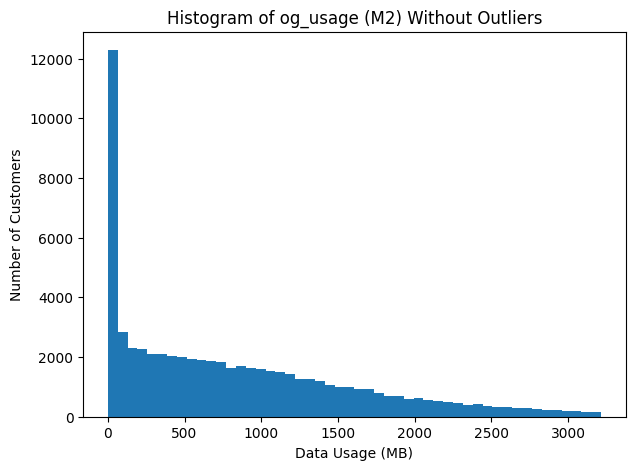

In [25]:
col = 'og_usage_m2'

Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

filtered_data = data[data[col] <= upper_limit]

mean_value = filtered_data[col].mean()
median_value = filtered_data[col].median()

print(f"Mean (without outliers): {mean_value:.2f}")
print(f"Median (without outliers): {median_value:.2f}")
print(f"Number of rows used: {len(filtered_data)}")

plt.figure(figsize=(7,5))
plt.hist(filtered_data[col].dropna(), bins=50)
plt.title("Histogram of og_usage (M2) Without Outliers")
plt.xlabel("Data Usage (MB)")
plt.ylabel("Number of Customers")
plt.show()

Mean (without outliers): 813.56
Number of rows used: 64278


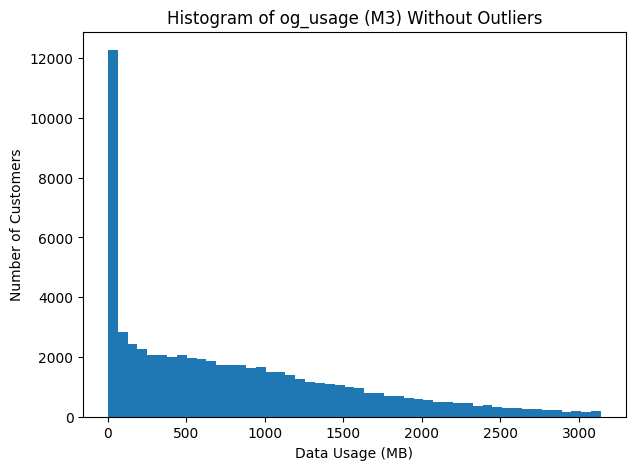

In [26]:
col = 'og_usage_m3'

Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

filtered_data = data[data[col] <= upper_limit]

mean_value = filtered_data[col].mean()

print(f"Mean (without outliers): {mean_value:.2f}")
print(f"Number of rows used: {len(filtered_data)}")

plt.figure(figsize=(7,5))
plt.hist(filtered_data[col].dropna(), bins=50)
plt.title("Histogram of og_usage (M3) Without Outliers")
plt.xlabel("Data Usage (MB)")
plt.ylabel("Number of Customers")
plt.show()

In [54]:
for col in ['og_usage_m1', 'og_usage_m2', 'og_usage_m3']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data['total_og_usage'] = data['og_usage_m1'] + data['og_usage_m2'] + data['og_usage_m3']

data[['Subscription_Id', 'og_usage_m1', 'og_usage_m2', 'og_usage_m3', 'total_og_usage']].head()


,Subscription_Id,og_usage_m1,og_usage_m2,og_usage_m3,total_og_usage
0,127122557,3679.0,3862.0,3422.0,10963.0
1,157038198,953.0,755.0,1257.0,2965.0
2,192116383,617.0,1153.0,612.0,2382.0
3,116872408,2270.0,1796.0,3882.0,7948.0
4,86447560,317.0,380.0,347.0,1044.0


In [55]:
data['total_og_usage'].mean()


np.float64(2721.8847488308948)

### Rev

In [27]:
print("Min revenue (rev_m1):", data['rev_m1'].min())
print("Max revenue (rev_m1):", data['rev_m1'].max())

negative_or_zero = data[data['rev_m1'] <= 0]
print(f"Number of rows with zero or negative revenue: {len(negative_or_zero)}")

negative_or_zero.head(10)


Min revenue (rev_m1): -3955.68
Max revenue (rev_m1): 45807.43
Number of rows with zero or negative revenue: 3016


,Subscription_Id,og_usage_m3,og_usage_m2,og_usage_m1,data_usage_m3,data_usage_m2,data_usage_m1,rev_m3,rev_m2,rev_m1,Rate_Plan_Desc,Most_Used_Region,aon,post_migration_plan
16,197436353,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,Bundle230,NaN,209.0,Bundle 2000
20,183986098,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,Bundle230,NaN,840.0,Bundle 2000
46,180802529,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,Bundle230,NaN,322.0,Bundle 2000
73,25062290,554.0,574.0,639.0,2860.0,3483.0,3375.0,0.83,-7.90,-17.00,BundleChild Voice,Delta,5121.0,Bundle 2000
86,122454353,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,Bundle230,NaN,3057.0,Bundle 2000
138,9241961,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,Bundle230,Upper,5672.0,Bundle 2000
193,188615697,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,Bundle230,NaN,534.0,Bundle 2000
195,120594567,1013.0,613.0,797.0,2530.0,3685.0,3460.0,0.83,-12.31,-11.48,BundleChild Voice,G.Cairo,3119.0,Bundle 2000
210,197424788,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,Bundle230,NaN,210.0,Bundle 2000
224,185221745,76.0,34.0,29.0,1583.0,1555.0,1656.0,3.26,-25.52,-18.53,BundleChild Voice,G.Cairo,776.0,Bundle 2000


In [28]:
col = 'rev_m1'
clean_data = data[data[col] > 0]

Q1 = clean_data[col].quantile(0.25)
Q3 = clean_data[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Lower limit: {lower_limit:.2f}")
print(f"Upper limit: {upper_limit:.2f}")

outlier_rows_count = (clean_data[col] > upper_limit).sum()
print(f"Number of rows above upper limit: {outlier_rows_count}")

outliers = clean_data[clean_data[col] > upper_limit]
outliers[['Subscription_Id', col]].head(10)


Lower limit: -1980.97
Upper limit: 3339.64
Number of rows above upper limit: 3748


,Subscription_Id,rev_m1
18,8691177,3505.55
93,192443448,3675.57
128,180291425,3476.31
151,155968333,3429.74
266,181411879,4065.45
289,180985748,3880.77
329,165777015,6093.22
336,163402251,11927.68
391,64734632,5481.24
431,69572332,3829.21


In [29]:
col = 'rev_m1'
clean_data = data[data[col] > 0]

Q1 = clean_data[col].quantile(0.25)
Q3 = clean_data[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

above_upper = (clean_data[col] > upper_limit).sum()

missing = clean_data[col].isna().sum()

filtered_data = clean_data[clean_data[col] <= upper_limit]
used_rows = len(filtered_data)

print(f"Rows above upper limit: {above_upper}")
print(f"Rows with NaN: {missing}")
print(f"Rows used after filtering: {used_rows}")
print(f"Total rows before cleaning: {len(data)}")
print(f"Rows excluded in total: {len(data) - used_rows}")


Rows above upper limit: 3748
Rows with NaN: 0
Rows used after filtering: 62793
Total rows before cleaning: 70000
Rows excluded in total: 7207


In [30]:
col = 'rev_m2'
clean_data = data[data[col] > 0]

Q1 = clean_data[col].quantile(0.25)
Q3 = clean_data[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Lower limit: {lower_limit:.2f}")
print(f"Upper limit: {upper_limit:.2f}")

outlier_rows_count = (clean_data[col] > upper_limit).sum()
print(f"Number of rows above upper limit: {outlier_rows_count}")

outliers = clean_data[clean_data[col] > upper_limit]
outliers[['Subscription_Id', col]].head(10)

Lower limit: -1288.17
Upper limit: 2154.51
Number of rows above upper limit: 3866


,Subscription_Id,rev_m2
18,8691177,2346.47
93,192443448,2258.86
266,181411879,2648.74
289,180985748,2464.06
329,165777015,3374.54
336,163402251,11792.39
391,64734632,2587.09
431,69572332,2840.50
647,64001948,3561.93
748,192181168,2787.25


In [31]:
col = 'rev_m2'
clean_data = data[data[col] > 0]

Q1 = clean_data[col].quantile(0.25)
Q3 = clean_data[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

above_upper = (clean_data[col] > upper_limit).sum()

missing = clean_data[col].isna().sum()

filtered_data = clean_data[clean_data[col] <= upper_limit]
used_rows = len(filtered_data)

print(f"Rows above upper limit: {above_upper}")
print(f"Rows with NaN: {missing}")
print(f"Rows used after filtering: {used_rows}")
print(f"Total rows before cleaning: {len(data)}")
print(f"Rows excluded in total: {len(data) - used_rows}")

Rows above upper limit: 3866
Rows with NaN: 0
Rows used after filtering: 62514
Total rows before cleaning: 70000
Rows excluded in total: 7486


In [32]:
col = 'rev_m3'
clean_data = data[data[col] > 0]

Q1 = clean_data[col].quantile(0.25)
Q3 = clean_data[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Lower limit: {lower_limit:.2f}")
print(f"Upper limit: {upper_limit:.2f}")

outlier_rows_count = (clean_data[col] > upper_limit).sum()
print(f"Number of rows above upper limit: {outlier_rows_count}")

outliers = clean_data[clean_data[col] > upper_limit]
outliers[['Subscription_Id', col]].head(10)

Lower limit: -637.55
Upper limit: 1064.79
Number of rows above upper limit: 3900


,Subscription_Id,rev_m3
266,181411879,1232.03
289,180985748,1232.03
299,177075636,1234.49
329,165777015,1376.70
336,163402251,11876.83
391,64734632,1293.50
431,69572332,1534.38
646,193896265,1232.03
647,64001948,1353.39
663,179599847,1090.63


In [33]:
col = 'rev_m2'
clean_data = data[data[col] > 0]

Q1 = clean_data[col].quantile(0.25)
Q3 = clean_data[col].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

above_upper = (clean_data[col] > upper_limit).sum()

missing = clean_data[col].isna().sum()

filtered_data = clean_data[clean_data[col] <= upper_limit]
used_rows = len(filtered_data)

print(f"Rows above upper limit: {above_upper}")
print(f"Rows with NaN: {missing}")
print(f"Rows used after filtering: {used_rows}")
print(f"Total rows before cleaning: {len(data)}")
print(f"Rows excluded in total: {len(data) - used_rows}")

Rows above upper limit: 3866
Rows with NaN: 0
Rows used after filtering: 62514
Total rows before cleaning: 70000
Rows excluded in total: 7486


Mean (without negatives & outliers): 744.61
Median (without negatives & outliers): 515.29
Number of rows used: 62793


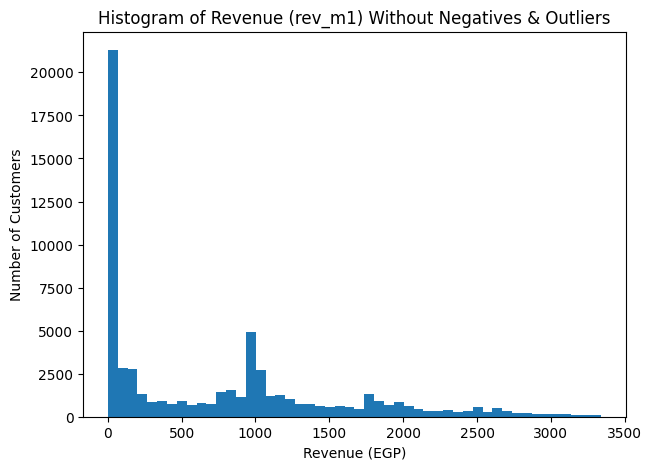

In [34]:
col = 'rev_m1'
clean_data = data[data[col] > 0]

Q1 = clean_data[col].quantile(0.25)
Q3 = clean_data[col].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

filtered_data = clean_data[clean_data[col] <= upper_limit]

mean_val = filtered_data[col].mean()
median_val = filtered_data[col].median()

print(f"Mean (without negatives & outliers): {mean_val:.2f}")
print(f"Median (without negatives & outliers): {median_val:.2f}")
print(f"Number of rows used: {len(filtered_data)}")

plt.figure(figsize=(7,5))
plt.hist(filtered_data[col].dropna(), bins=50)
plt.title("Histogram of Revenue (rev_m1) Without Negatives & Outliers")
plt.xlabel("Revenue (EGP)")
plt.ylabel("Number of Customers")
plt.show()



Mean (without negatives & outliers): 473.77
Median (without negatives & outliers): 313.83
Number of rows used: 62514


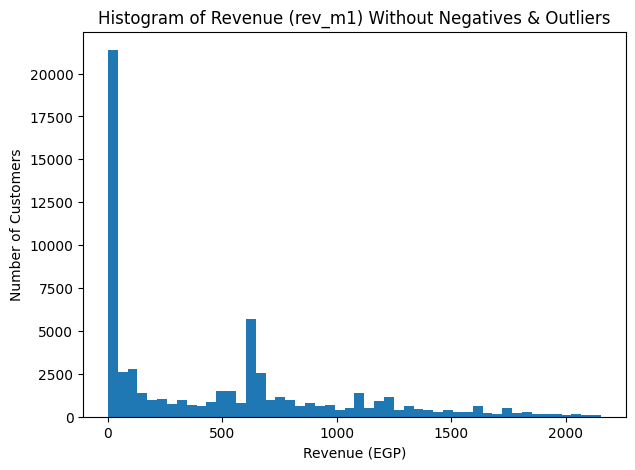

In [35]:
col = 'rev_m2'
clean_data = data[data[col] > 0]

Q1 = clean_data[col].quantile(0.25)
Q3 = clean_data[col].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

filtered_data = clean_data[clean_data[col] <= upper_limit]

mean_val = filtered_data[col].mean()
median_val = filtered_data[col].median()

print(f"Mean (without negatives & outliers): {mean_val:.2f}")
print(f"Median (without negatives & outliers): {median_val:.2f}")
print(f"Number of rows used: {len(filtered_data)}")

plt.figure(figsize=(7,5))
plt.hist(filtered_data[col].dropna(), bins=50)
plt.title("Histogram of Revenue (rev_m1) Without Negatives & Outliers")
plt.xlabel("Revenue (EGP)")
plt.ylabel("Number of Customers")
plt.show()

Mean (without negatives & outliers): 744.61
Median (without negatives & outliers): 515.29
Number of rows used: 62793


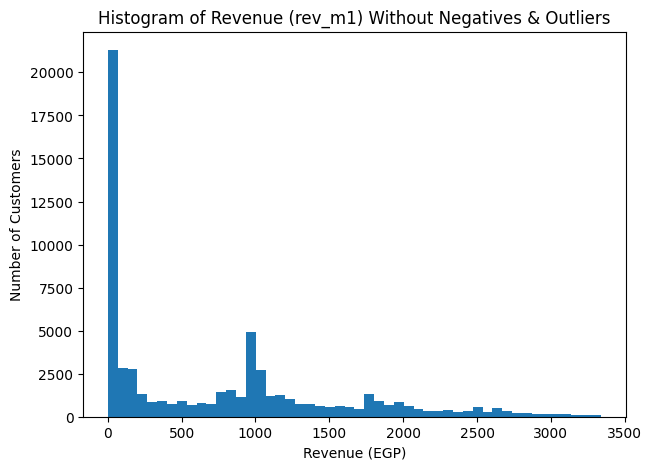

In [36]:
col = 'rev_m1'
clean_data = data[data[col] > 0]

Q1 = clean_data[col].quantile(0.25)
Q3 = clean_data[col].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

filtered_data = clean_data[clean_data[col] <= upper_limit]

mean_val = filtered_data[col].mean()
median_val = filtered_data[col].median()

print(f"Mean (without negatives & outliers): {mean_val:.2f}")
print(f"Median (without negatives & outliers): {median_val:.2f}")
print(f"Number of rows used: {len(filtered_data)}")

plt.figure(figsize=(7,5))
plt.hist(filtered_data[col].dropna(), bins=50)
plt.title("Histogram of Revenue (rev_m1) Without Negatives & Outliers")
plt.xlabel("Revenue (EGP)")
plt.ylabel("Number of Customers")
plt.show()

In [37]:
data['rev'] = data['rev_m1'] + data['rev_m2'] + data['rev_m3']


In [38]:
data[['rev_m1', 'rev_m2', 'rev_m3', 'rev']].head()


,rev_m1,rev_m2,rev_m3,rev
0,547.56,318.42,61.31,927.29
1,11.27,10.44,9.61,31.32
2,2280.21,863.50,739.55,3883.26
3,1552.94,1010.38,378.83,2942.15
4,634.22,238.17,26.95,899.34


In [57]:
data['rev'].mean()


np.float64(1845.5105021541688)

### (Descriptive Statistics)

In [39]:
numeric_cols = [
    'og_usage_m1', 'og_usage_m2', 'og_usage_m3',
    'data_usage_m1', 'data_usage_m2', 'data_usage_m3',
    'rev_m1', 'rev_m2', 'rev_m3'
]

cleaned_data = data.copy()

for col in numeric_cols:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')

for col in numeric_cols:
    if col.startswith('rev'):
        cleaned_data = cleaned_data[cleaned_data[col] > 0]

    Q1 = cleaned_data[col].quantile(0.25)
    Q3 = cleaned_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    cleaned_data = cleaned_data[
        (cleaned_data[col] >= lower_limit) &
        (cleaned_data[col] <= upper_limit)
    ]

cleaned_summary = cleaned_data[numeric_cols].describe()
cleaned_summary


,og_usage_m1,og_usage_m2,og_usage_m3,data_usage_m1,data_usage_m2,data_usage_m3,rev_m1,rev_m2,rev_m3
count,49164.000000,49164.000000,49164.000000,49164.000000,49164.000000,49164.000000,49164.000000,49164.000000,49164.000000
mean,728.039602,770.854792,756.415324,7646.265296,8028.751403,8188.512774,581.855351,373.912913,181.823917
std,675.581151,702.234451,683.356296,7420.074589,7563.115559,7555.061761,634.019173,406.642895,200.402960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.020000,0.010000
25%,129.000000,153.000000,161.000000,961.750000,1210.000000,1398.000000,2.490000,1.660000,0.830000
50%,576.000000,614.000000,604.000000,6022.000000,6436.500000,6618.000000,272.300000,186.340000,82.910000
75%,1152.000000,1208.000000,1180.000000,12035.250000,12544.000000,12879.000000,1005.310000,630.562500,308.630000
max,3075.000000,3060.000000,2896.000000,34834.000000,33103.000000,31989.000000,2690.610000,1633.010000,770.330000


### (Correlation Analysis)

In [40]:
cols = [
    'og_usage_m1', 'og_usage_m2', 'og_usage_m3',
    'data_usage_m1', 'data_usage_m2', 'data_usage_m3',
    'rev_m1', 'rev_m2', 'rev_m3'
]


for col in cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

correlation_matrix = data[cols].corr()

print("📊 Correlation Between All Usage & Revenue Columns:")
print(correlation_matrix.round(3))



📊 Correlation Between All Usage & Revenue Columns:
               og_usage_m1  og_usage_m2  og_usage_m3  data_usage_m1  \
og_usage_m1          1.000        0.884        0.825          0.346   
og_usage_m2          0.884        1.000        0.875          0.327   
og_usage_m3          0.825        0.875        1.000          0.311   
data_usage_m1        0.346        0.327        0.311          1.000   
data_usage_m2        0.322        0.337        0.314          0.820   
data_usage_m3        0.303        0.316        0.336          0.754   
rev_m1               0.158        0.168        0.175          0.393   
rev_m2               0.146        0.157        0.172          0.366   
rev_m3               0.133        0.141        0.158          0.343   

               data_usage_m2  data_usage_m3  rev_m1  rev_m2  rev_m3  
og_usage_m1            0.322          0.303   0.158   0.146   0.133  
og_usage_m2            0.337          0.316   0.168   0.157   0.141  
og_usage_m3            0.314

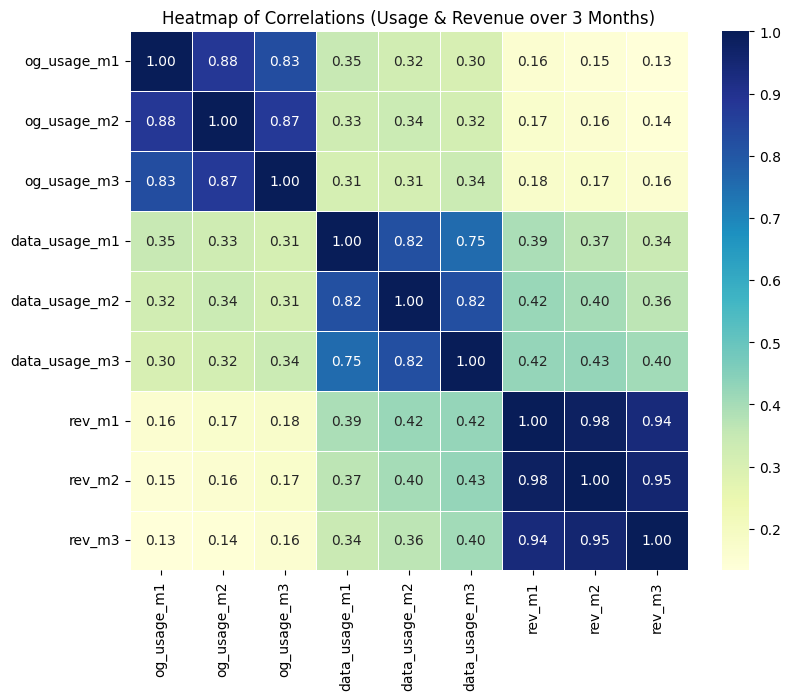

In [41]:
cols = [
    'og_usage_m1', 'og_usage_m2', 'og_usage_m3',
    'data_usage_m1', 'data_usage_m2', 'data_usage_m3',
    'rev_m1', 'rev_m2', 'rev_m3'
]

for col in cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

corr = data[cols].corr()

# نرسم الخريطة الحرارية
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of Correlations (Usage & Revenue over 3 Months)")
plt.show()


### Correlation Between Customer Age on Network (AON) and Monthly Revenue (M1–M3)

Correlation between AON and Revenue per month:
rev_m1: -0.017
rev_m2: -0.015
rev_m3: -0.021


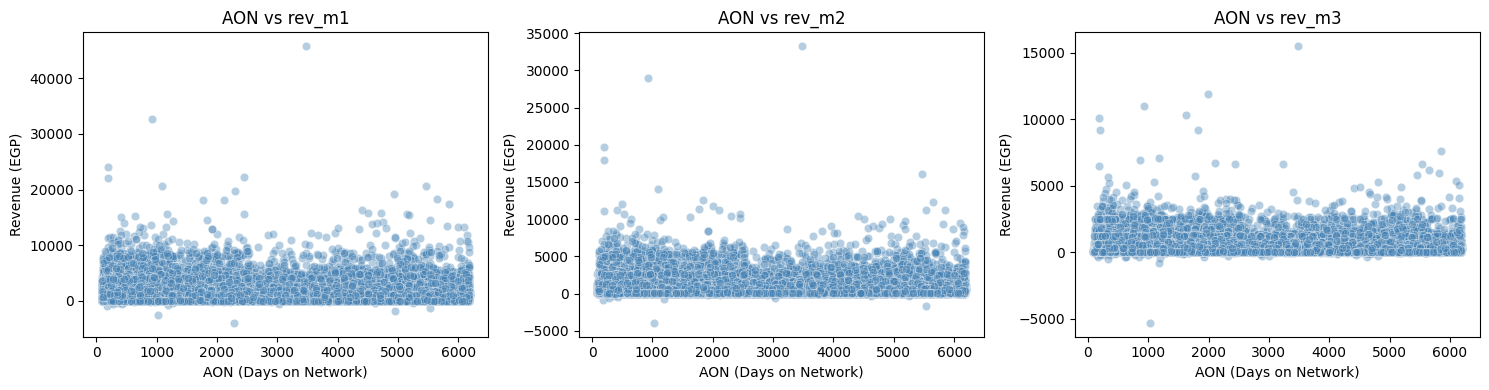

In [42]:

rev_cols = ['rev_m1', 'rev_m2', 'rev_m3']
data['aon'] = pd.to_numeric(data['aon'], errors='coerce')
for col in rev_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

print("Correlation between AON and Revenue per month:")
for col in rev_cols:
    corr = data['aon'].corr(data[col])
    print(f"{col}: {corr:.3f}")

plt.figure(figsize=(15, 4))

for i, col in enumerate(rev_cols, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x='aon', y=col, data=data, alpha=0.4, color='steelblue')
    plt.title(f"AON vs {col}")
    plt.xlabel("AON (Days on Network)")
    plt.ylabel("Revenue (EGP)")

plt.tight_layout()
plt.show()


### Correlation between AON and Data Usage per month:


Correlation between AON and Data Usage per month:
data_usage_m1: 0.085
data_usage_m2: 0.080
data_usage_m3: 0.087


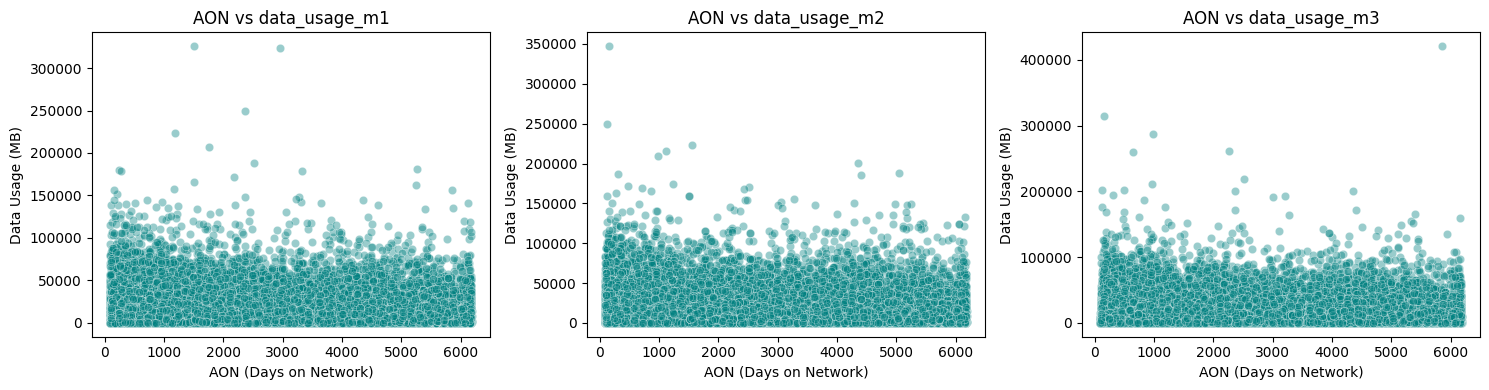

In [43]:
data_cols = ['data_usage_m1', 'data_usage_m2', 'data_usage_m3']
data['aon'] = pd.to_numeric(data['aon'], errors='coerce')
for col in data_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

print("Correlation between AON and Data Usage per month:")
for col in data_cols:
    corr = data['aon'].corr(data[col])
    print(f"{col}: {corr:.3f}")

plt.figure(figsize=(15, 4))

for i, col in enumerate(data_cols, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x='aon', y=col, data=data, alpha=0.4, color='teal')
    plt.title(f"AON vs {col}")
    plt.xlabel("AON (Days on Network)")
    plt.ylabel("Data Usage (MB)")

plt.tight_layout()
plt.show()


Correlation between AON and Outgoing Usage per month:
og_usage_m1: 0.196
og_usage_m2: 0.193
og_usage_m3: 0.202


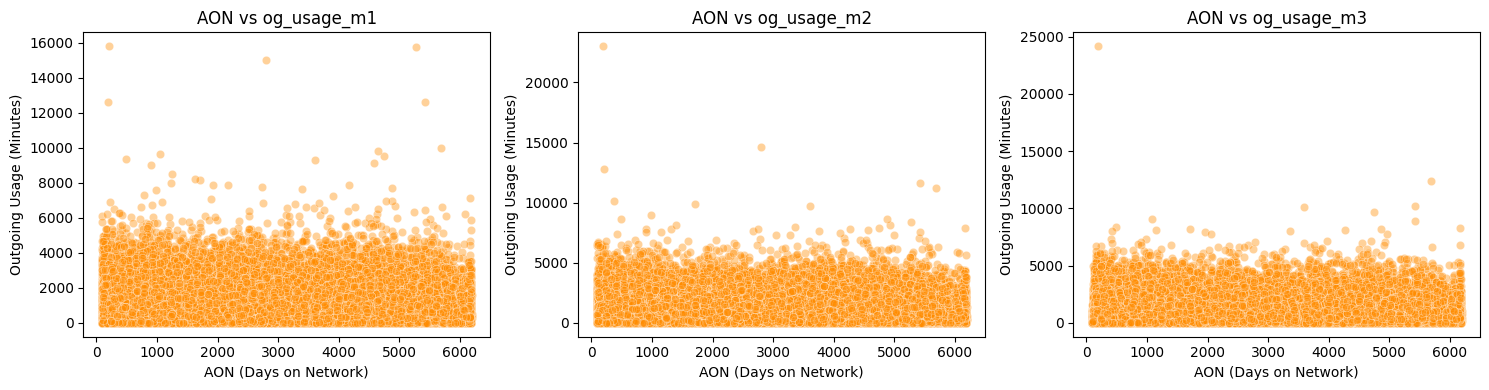

In [44]:
og_cols = ['og_usage_m1', 'og_usage_m2', 'og_usage_m3']

data['aon'] = pd.to_numeric(data['aon'], errors='coerce')
for col in og_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

print("Correlation between AON and Outgoing Usage per month:")
for col in og_cols:
    corr = data['aon'].corr(data[col])
    print(f"{col}: {corr:.3f}")
    
plt.figure(figsize=(15, 4))

for i, col in enumerate(og_cols, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x='aon', y=col, data=data, alpha=0.4, color='darkorange')
    plt.title(f"AON vs {col}")
    plt.xlabel("AON (Days on Network)")
    plt.ylabel("Outgoing Usage (Minutes)")

plt.tight_layout()
plt.show()


### Most_Used_Region

In [45]:
data['Most_Used_Region'] = data['Most_Used_Region'].replace('?', 'Other')

print(data['Most_Used_Region'].unique())


['G.Cairo' nan 'Upper' 'Delta' 'G.Alex' 'Canal']


In [46]:
region_counts = data['Most_Used_Region'].value_counts()
print(region_counts)


Most_Used_Region
G.Cairo    42451
Upper       5963
Delta       5633
G.Alex      5200
Canal       1695
Name: count, dtype: int64


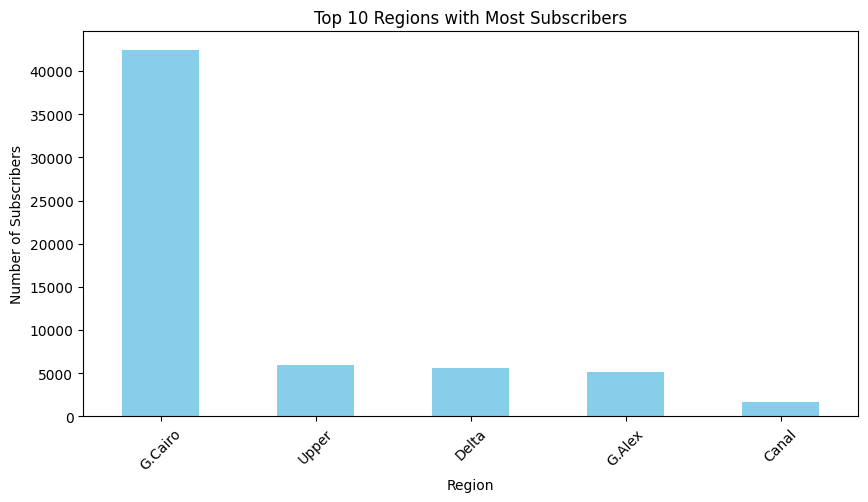

In [47]:
region_counts.head().plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title('Top 10 Regions with Most Subscribers')
plt.xlabel('Region')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=45)
plt.show()

### Rate_Plan_Desc

In [48]:
data['Rate_Plan_Desc'].unique()


array(['BundleChild Voice', 'Bundle1150', 'Bundle230', 'Bundle450',
       'Bundle690', 'Bundle2300'], dtype=object)

In [49]:
data['Rate_Plan_Desc'].value_counts()


Rate_Plan_Desc
BundleChild Voice    32043
Bundle230            23624
Bundle450             6901
Bundle1150            3941
Bundle690             2844
Bundle2300             647
Name: count, dtype: int64

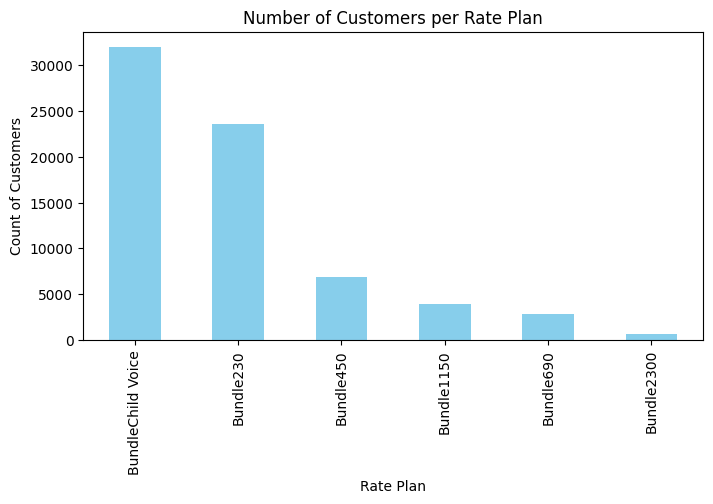

In [61]:
data['Rate_Plan_Desc'].value_counts().plot(kind='bar', figsize=(8,4), color='skyblue')
plt.title("Number of Customers per Rate Plan")
plt.xlabel("Rate Plan")
plt.ylabel("Count of Customers")
plt.show()

In [50]:
data.groupby('Rate_Plan_Desc')['rev'].mean().sort_values(ascending=False)


Rate_Plan_Desc
Bundle2300           11679.222240
Bundle1150            6798.854045
Bundle690             5193.062684
Bundle450             3681.847112
Bundle230             1989.195921
BundleChild Voice      280.235224
Name: rev, dtype: float64

In [59]:
data.groupby('Rate_Plan_Desc')['total_data_usage'].mean().sort_values(ascending=False)


Rate_Plan_Desc
Bundle2300           78179.631667
Bundle690            60969.295873
Bundle1150           59676.364486
Bundle450            53738.630162
BundleChild Voice    29965.398300
Bundle230            29268.537027
Name: total_data_usage, dtype: float64

In [60]:
data.groupby('Rate_Plan_Desc')['total_og_usage'].mean().sort_values(ascending=False)

Rate_Plan_Desc
Bundle450            3630.781738
Bundle690            3548.889462
Bundle1150           2820.493403
BundleChild Voice    2625.798449
Bundle230            2483.676447
Bundle2300           2142.166667
Name: total_og_usage, dtype: float64

### post_migration_plan

In [ ]:
data['post_migration_plan'].value_counts()


post_migration_plan
Bundle 2000    704
Name: count, dtype: int64

In [65]:
migrated = data[data['post_migration_plan'] == 'Bundle 2000']

migrated.loc[:, 'rev_change'] = migrated['rev_m3'] - migrated['rev_m1']
migrated.loc[:, 'data_usage_change'] = migrated['data_usage_m3'] - migrated['data_usage_m1']

print(" Average change for customers migrated to Bundle 2000:")
print(f"Average revenue change: {migrated['rev_change'].mean():.2f}")
print(f"Average data usage change: {migrated['data_usage_change'].mean():.2f}")



 Average change for customers migrated to Bundle 2000:
Average revenue change: -484.55
Average data usage change: 1311.45


C:\Users\ahmed\AppData\Local\Temp\ipykernel_1376\2846095688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migrated.loc[:, 'data_usage_change'] = migrated['data_usage_m3'] - migrated['data_usage_m1']


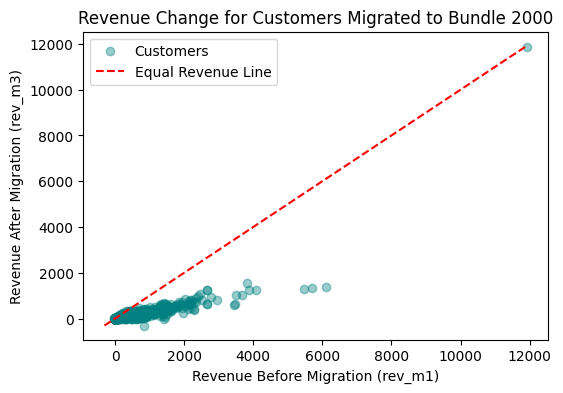

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(migrated['rev_m1'], migrated['rev_m3'], alpha=0.4, color='teal', label='Customers')

min_val = min(migrated['rev_m1'].min(), migrated['rev_m3'].min())
max_val = max(migrated['rev_m1'].max(), migrated['rev_m3'].max())

plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Equal Revenue Line')

plt.xlabel("Revenue Before Migration (rev_m1)")
plt.ylabel("Revenue After Migration (rev_m3)")
plt.title("Revenue Change for Customers Migrated to Bundle 2000")
plt.legend()
plt.show()


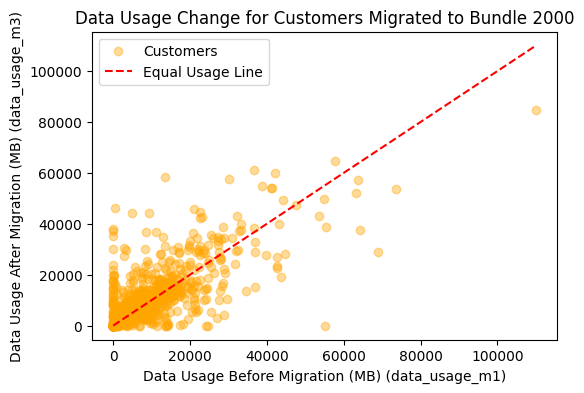

In [68]:
plt.figure(figsize=(6,4))

plt.scatter(migrated['data_usage_m1'], migrated['data_usage_m3'], alpha=0.4, color='orange', label='Customers')

min_val = min(migrated['data_usage_m1'].min(), migrated['data_usage_m3'].min())
max_val = max(migrated['data_usage_m1'].max(), migrated['data_usage_m3'].max())

plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Equal Usage Line')

plt.xlabel("Data Usage Before Migration (MB) (data_usage_m1)")
plt.ylabel("Data Usage After Migration (MB) (data_usage_m3)")
plt.title("Data Usage Change for Customers Migrated to Bundle 2000")
plt.legend()
plt.show()


### segmentation & insights

In [69]:
cols = ['rev', 'total_data_usage', 'total_og_usage', 'aon']
for col in cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data[cols].head()


,rev,total_data_usage,total_og_usage,aon
0,927.29,19003.0,10963.0,2942.0
1,31.32,57.0,2965.0,112.0
2,3883.26,11063.0,2382.0,NaN
3,2942.15,85846.0,7948.0,3225.0
4,899.34,4235.0,1044.0,3592.0


In [70]:
data['Revenue_Segment'] = pd.qcut(data['rev'], q=3, labels=['Low', 'Medium', 'High'])
data['Revenue_Segment'].value_counts()


Revenue_Segment
Low       22904
High      22902
Medium    22898
Name: count, dtype: int64

In [73]:
segment_summary = data.groupby('Revenue_Segment')[['rev', 'total_data_usage', 'total_og_usage', 'aon']].mean().round(2)
segment_summary


C:\Users\ahmed\AppData\Local\Temp\ipykernel_1376\3541445936.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary = data.groupby('Revenue_Segment')[['rev', 'total_data_usage', 'total_og_usage', 'aon']].mean().round(2)


,rev,total_data_usage,total_og_usage,aon
Revenue_Segment,,,,
Low,10.20,21122.49,2110.25,2297.18
Medium,1063.05,27998.01,2572.43,2070.05
High,4463.30,56168.65,3482.19,2188.27


In [74]:
data['Data_Segment'] = pd.qcut(data['total_data_usage'], q=3, labels=['Low', 'Medium', 'High'])
data['Data_Segment'].value_counts()


Data_Segment
Low       22098
High      22097
Medium    22095
Name: count, dtype: int64

In [75]:
segment_usage_summary = data.groupby('Data_Segment')[['total_data_usage', 'total_og_usage', 'rev', 'aon']].mean().round(2)
segment_usage_summary


C:\Users\ahmed\AppData\Local\Temp\ipykernel_1376\1035673367.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_usage_summary = data.groupby('Data_Segment')[['total_data_usage', 'total_og_usage', 'rev', 'aon']].mean().round(2)


,total_data_usage,total_og_usage,rev,aon
Data_Segment,,,,
Low,3794.28,1197.81,1117.57,1847.60
Medium,25312.51,2897.59,1521.86,2332.49
High,77139.50,4070.34,3071.95,2437.45


In [76]:
data['Call_Segment'] = pd.qcut(data['total_og_usage'], q=3, labels=['Low', 'Medium', 'High'])
data['Call_Segment'].value_counts()


Call_Segment
Low       22106
Medium    22093
High      22091
Name: count, dtype: int64

In [77]:
segment_call_summary = data.groupby('Call_Segment')[['total_og_usage', 'total_data_usage', 'rev', 'aon']].mean().round(2)
segment_call_summary


C:\Users\ahmed\AppData\Local\Temp\ipykernel_1376\2131751832.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_call_summary = data.groupby('Call_Segment')[['total_og_usage', 'total_data_usage', 'rev', 'aon']].mean().round(2)


,total_og_usage,total_data_usage,rev,aon
Call_Segment,,,,
Low,316.09,16037.91,1574.52,1561.09
Medium,2106.51,37360.49,1727.47,2407.60
High,5744.75,52860.35,2412.87,2647.37


In [78]:
region_summary = data.groupby('Most_Used_Region')[['rev', 'total_data_usage', 'total_og_usage']].mean().round(2)
region_summary.sort_values(by='rev', ascending=False)


,rev,total_data_usage,total_og_usage
Most_Used_Region,,,
Canal,2032.93,42694.42,3072.98
G.Cairo,2001.68,37768.03,2930.73
G.Alex,1895.59,35153.25,2542.62
Upper,1696.89,36779.95,3150.89
Delta,1615.10,33939.87,2647.91
